[*********************100%***********************]  1 of 1 completed
Best ARIMA Parameters: p=0, d=1, q=0
RMSE: 2.1580447787479917
MAE: 1.6019354874566694
R2: 0.9870358585705001
MAPE: 0.01%
Theil U statistic : 0.15
Initial Balance: $10000
Final Balance: $9485.43
Profit or Loss: $-514.57


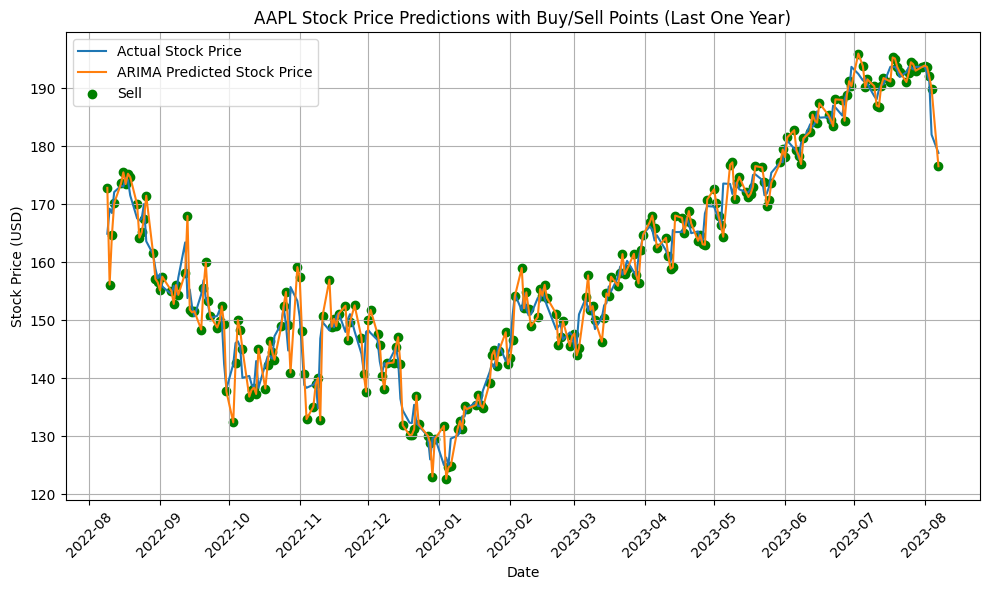

In [13]:
import random
import warnings
import tensorflow as tf
from functions import *

warnings.simplefilter("ignore")

# Initialize GPU config
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    try:
        tf.config.experimental.set_memory_growth(gpu_devices[0], True)
    except RuntimeError:
        # Memory growth must be set before GPUs have been initialized
        pass

SEED_VALUE = 42
np.random.seed(SEED_VALUE)
random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

algorithm = "ARIMA"
ticker = "AAPL"
dataset = load_data(ticker)
dataset, data = clean_data(dataset)
train_size = int(len(data) * 0.8)
train_data, test_data, scaler = split_data(data)
train_data_2d = train_data.reshape(-1, 1)
test_data_2d = test_data.reshape(-1, 1)

best_theil_u, best_p, best_d, best_q = get_best_params(data)
arima_predictions = get_arima_predictions(scaler, train_data_2d, test_data_2d, best_p, best_d, best_q)
print_metrics(data, train_size, arima_predictions, best_theil_u)

one_year_data, one_year_data_2d, one_year_2d, one_year_arima_predictions = get_one_year_data(dataset, scaler, train_data_2d)
print_trading_result(one_year_data, one_year_2d, one_year_arima_predictions)
plot_trading_result(algorithm, ticker, one_year_data, one_year_2d, one_year_arima_predictions)
